## TRNU.CSN: Supervised Classification TP1 2025

Vincent Itier, Juan-Manuel Miramont

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#TODO ADD other needed libraries

## Data Set Information

This is perhaps the best known database to be found in the pattern recognition literature. Fisher’s
paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for
example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of
iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable
from each other. The predicted attribute (the output) is the class of iris plant.

### Features Information

1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm
1. classes: Iris Setosa, Iris Versicolour, Iris Virginica

## Exercises
In this TP, you are supposed to play with different classification techniques.

Objectives are: learning how to handle data for supervised classification, applying some well known ML methods and evaluate them.

### 1. Data visualisation
1. Laod the 'iris.csv' file using the pandas librairy.
1. Show the raw dataset using `head()`.
1. Show data using `seaborn.pairplot`.

In [5]:
iris_df = pd.read_csv('iris.csv')

In [6]:
display(iris_df.head())


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


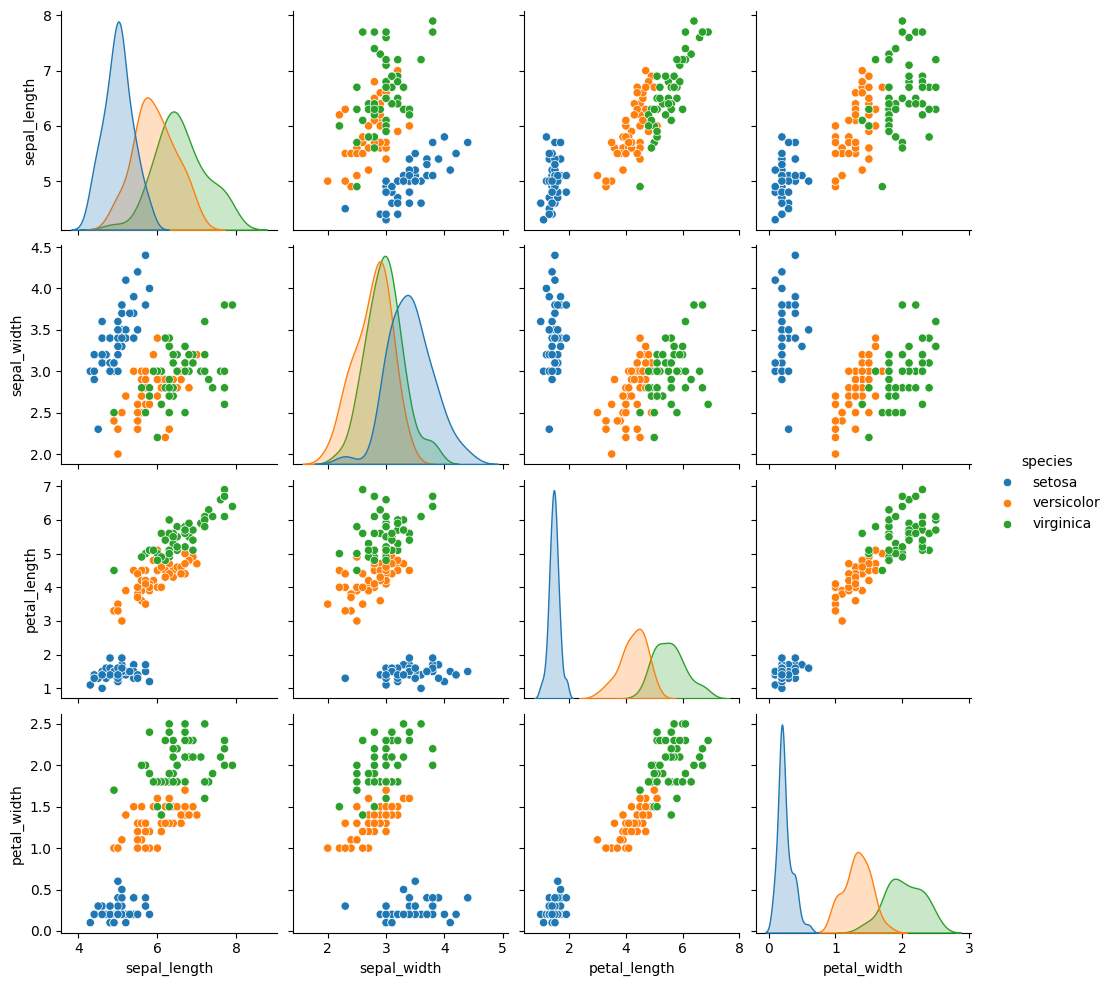

In [7]:
sns.pairplot(iris_df, hue='species')
plt.show()

### 2. Dataset preprocessing
1. Make two numpy array $X$ and $y$, they contain respectively the set of feature vector and their label.
1. Map label to integer using `LabelEncoder` from `sklearn.preprocessing`. Now you got the set of feature vector and their corresponding true label.
1. T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning algorithm for visualization. It can be used from `sklearn.manifold.TSNE`. Embed data (not label) into two dimension. Plot these points using their labels to color them. Change the perplexity parameter.

In [8]:
X = iris_df.drop('species', axis=1).values
y = iris_df['species'].values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = iris_df.drop('species', axis=1).values
y = iris_df['species'].values
filtro = y
y_encoded = le.fit_transform(y)

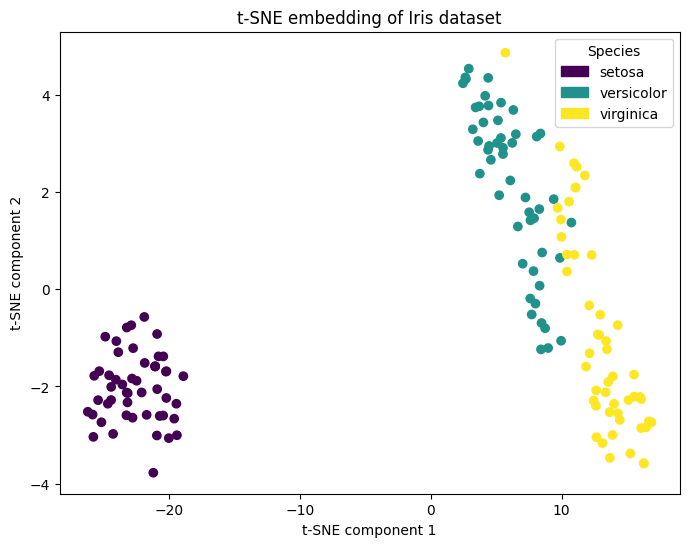

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Initialize t-SNE with a perplexity value (you can change this)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

# Fit and transform the data
X_embedded = tsne.fit_transform(X)

# Plot the embedded data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_encoded, cmap='viridis')
plt.title('t-SNE embedding of Iris dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

# Manually create legend handles (proxy artists)
colors = [scatter.cmap(scatter.norm(i)) for i in range(len(le.classes_))]
handless = [mpatches.Patch(color=colors[i], label=le.classes_[i]) for i in range(len(le.classes_))]

# Create the legend
plt.legend(handles=handless, title="Species")

plt.show()

### 3. Classifier comparison.
__Note__ that in this database, we do not have test data, so in order to validate the best classification technique (and the best parameters of the technique), we will use cross-validation techniques.

1. From what we observe, we can think of using linear classifier such as `LinearDiscriminantAnalysis` from `sklearn.discriminant_analysis`. Use `KFold` from `sklearn.model_selection` to train and evaluate the classifier on 5 differents folds. For the evaluation, we will use the accuracy. Display and comment on the mean and standard deviation of the results.
1. Make a function, `cross_val_acc_std` that is adapted from the previous code, we will use to compare different classifier.
1. We observe that the linear classifier is not enough, make a list of different classifier `SVC` with an 'rbf' kernel, `QuadraticDiscriminantAnalysis`, `Perceptron`, use your function to evaluate them and plot the score using errorbars.

__Note__ Once the models is validated, all the data can be used to train it.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the classifier
lda = LinearDiscriminantAnalysis()

# Initialize KFold for 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store accuracy scores
accuracy_scores = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Train the classifier
    lda.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lda.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and display the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Mean accuracy: {mean_accuracy:.4f}")
print(f"Standard deviation of accuracy: {std_accuracy:.4f}")

Mean accuracy: 0.9800
Standard deviation of accuracy: 0.0163


In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

def cross_val_acc_std(classifier, X, y_encoded, n_splits=5, random_state=42):
    """
    Performs KFold cross-validation and returns the mean and standard deviation of accuracy scores.

    Args:
        classifier: The scikit-learn classifier to evaluate.
        X: Feature array.
        y_encoded: Encoded label array.
        n_splits: Number of splits for KFold.
        random_state: Random state for KFold.

    Returns:
        A tuple containing the mean and standard deviation of the accuracy scores.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    accuracy_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    return np.mean(accuracy_scores), np.std(accuracy_scores)

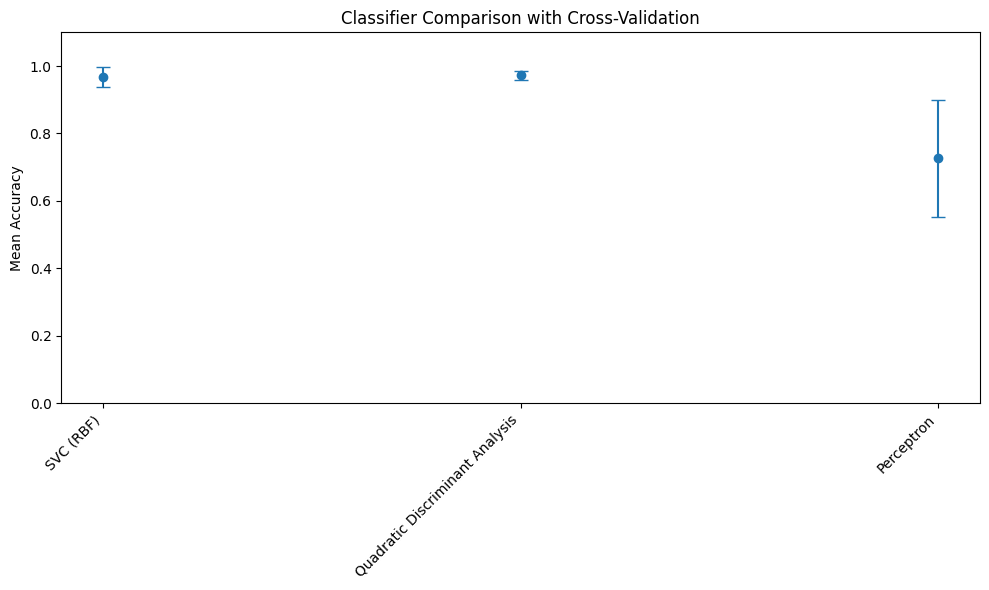

In [13]:
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    'SVC (RBF)': SVC(kernel='rbf', random_state=42),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Perceptron': Perceptron(random_state=42)
}

# Evaluate classifiers and store results
results = {}
for name, clf in classifiers.items():
    mean_acc, std_acc = cross_val_acc_std(clf, X, y_encoded)
    results[name] = {'mean_accuracy': mean_acc, 'std_accuracy': std_acc}

# Prepare data for plotting
classifier_names = list(results.keys())
mean_accuracies = [results[name]['mean_accuracy'] for name in classifier_names]
std_deviations = [results[name]['std_accuracy'] for name in classifier_names]

# Plot the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(classifier_names, mean_accuracies, yerr=std_deviations, fmt='o', capsize=5)
plt.ylim(0, 1.1)
plt.ylabel('Mean Accuracy')
plt.title('Classifier Comparison with Cross-Validation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Decision Tree
1. Split the dataset into training and test sets.
1. Using `tree.DecisionTreeClassifier()` from scikit-learn, build a decision tree fitting your training set. We have studied information gain as splitting criterion. It can be used by setting the argument criterion.
1. Predict the class of test samples.
1. Test and comment DecisionTreeClassifier optional parameters, using `classification_report` from scikit-learn
1. Plot confusion matrix

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with criterion='gini' for information gain
decision_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
# Predict the class of test samples
y_pred = decision_tree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



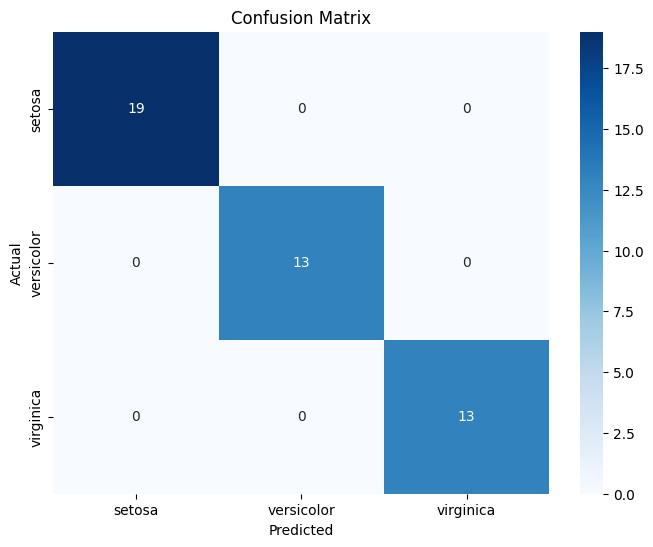

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 5. Tree Interpretation
1. Show the decision tree using options such as `feature_names`, `class_names`, `filled` \dots
1. Using `feature_importances_` attribute from tree, show the most discriminative features.
1. Plot the regions of decision between "sepal_length", "sepal_width", on a grid from 4 to 8.5 on x and from 1.5 to 4.5 on y axis, using `meshgrid()` from numpy. Add the points of the training set superimposed.

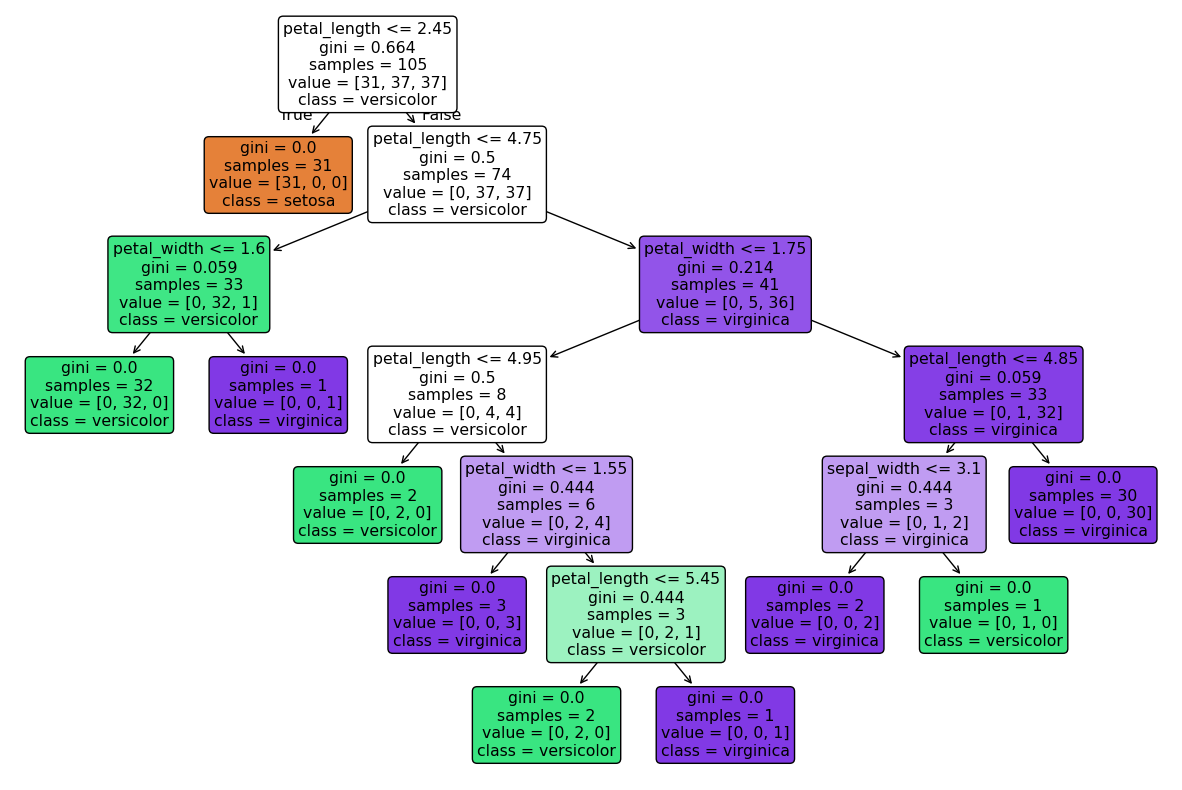

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=iris_df.drop('species', axis=1).columns, class_names=le.classes_, filled=True, rounded=True)
plt.show()

In [20]:
# Show feature importances
importances = decision_tree.feature_importances_

# Get feature names
feature_names = iris_df.drop('species', axis=1).columns

# Create a pandas Series for better visualization
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
petal_length    0.893264
petal_width     0.087626
sepal_width     0.019110
sepal_length    0.000000
dtype: float64


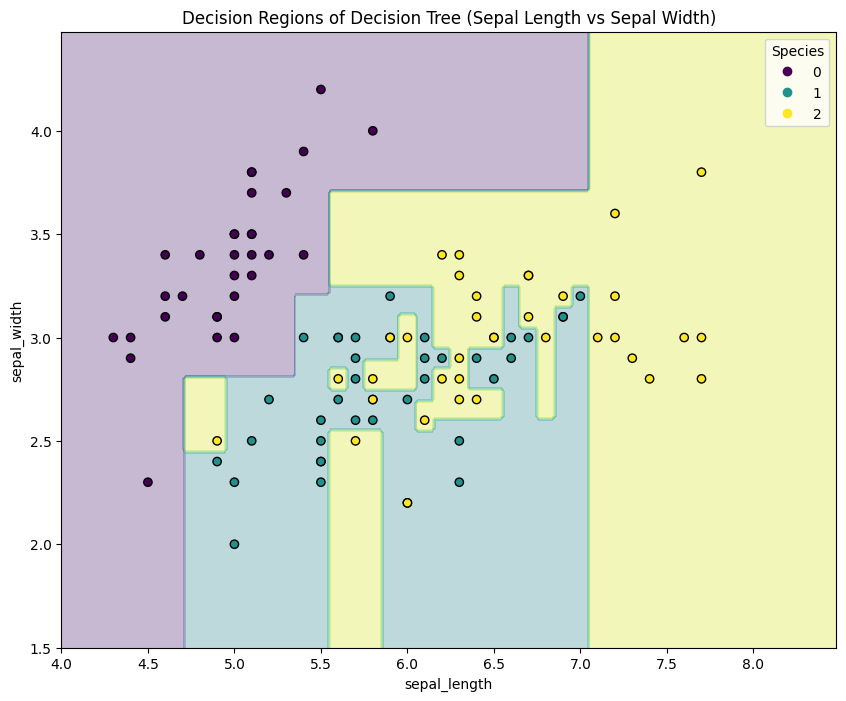

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Select only the sepal length and sepal width features for plotting
X_plot = X_train[:, [0, 1]] # Assuming sepal_length is the first column (index 0) and sepal_width is the second (index 1)
y_plot = y_train

# Create a meshgrid
x_min, x_max = 4.0, 8.5
y_min, y_max = 1.5, 4.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Train a new decision tree classifier using only the two selected features
# This is necessary to plot decision boundaries in a 2D feature space
decision_tree_2d = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_2d.fit(X_plot, y_plot)


# Predict the class for each point in the meshgrid
Z = decision_tree_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the training points
scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolors='k', cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Decision Regions of Decision Tree (Sepal Length vs Sepal Width)')
plt.legend(*scatter.legend_elements(), title="Species")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

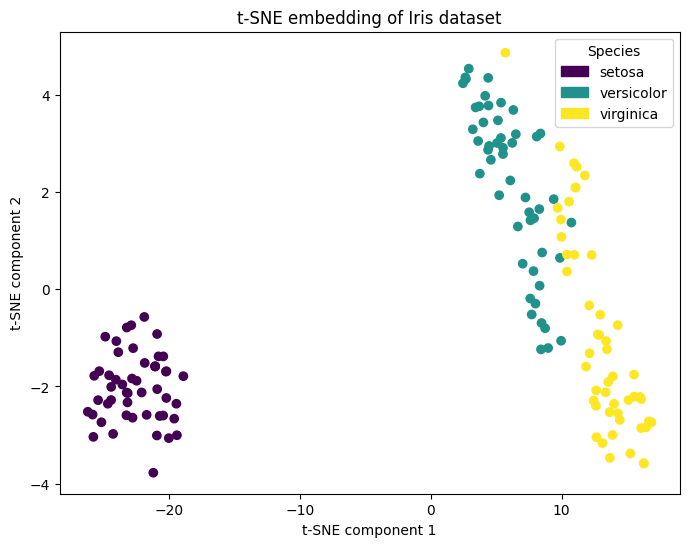

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Initialize t-SNE with a perplexity value (you can change this)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

# Fit and transform the data
X_embedded = tsne.fit_transform(X)

# Plot the embedded data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_encoded, cmap='viridis')
plt.title('t-SNE embedding of Iris dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

# Manually create legend handles (proxy artists)
colors = [scatter.cmap(scatter.norm(i)) for i in range(len(le.classes_))]
handles = [mpatches.Patch(color=colors[i], label=le.classes_[i]) for i in range(len(le.classes_))]

# Create the legend
plt.legend(handles=handles, title="Species")

plt.show()